## **Automatizando a Seleção de Investimentos: Backtesting da Magic Formula de Joel Greenblatt**
Compartilho com entusiasmo um projeto especial que desenvolvi recentemente, unindo minha paixão pela programação ao mercado financeiro.

Utilizando a renomada Magic Formula de Joel Greenblatt, criei um código em Python para automatizar a seleção de investimentos na bolsa brasileira. Por meio de web scraping, o código extrai dados fundamentalistas das empresas listadas na B3, filtra-as com base nos critérios da Magic Formula e cria uma carteira de investimentos com as melhores oportunidades.

Realizei um backtesting que revelou resultados fascinantes. Durante o período analisado, a carteira baseada na Magic Formula superou consistentemente benchmarks como o CDI e o iBOVESPA, evidenciando o potencial dessa estratégia em gerar retornos positivos a longo prazo.

Esse projeto tem um significado especial para mim, pois une duas áreas que me apaixonam: o mercado financeiro e a programação. Através do desenvolvimento do código, pude perceber o poder transformador da automação e como a utilização de algoritmos pode trazer benefícios significativos para investidores em busca de estratégias sólidas e baseadas em dados confiáveis.

Como profissional do mercado financeiro, estou sempre em busca de novas maneiras de aprimorar minha abordagem de investimentos. A programação tem se mostrado uma ferramenta indispensável nesse processo, permitindo explorar e aplicar técnicas avançadas de análise de dados em meus estudos financeiros.



In [27]:
#Importando as bibliotecas necessárias para o projeto
import numpy as np
import pandas as pd
import string
import warnings
import requests
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns; sns.set()

yf.pdr_override()

start_date = '2018-01-01'
end_date = '2023-02-27'


In [28]:
#Baixando dados fundamentalistas das empresas
url = 'https://www.fundamentus.com.br/resultado.php'
header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [29]:
#Iniciando o tratamento de dados em nossa base
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
    df[coluna] = df[coluna].replace('.', '')
    df[coluna] = df[coluna].replace(',', '.')
    df[coluna] = df[coluna].astype(str).str.rstrip('%')
    df[coluna] = df[coluna].apply(lambda x: float(x.replace('.', '').replace(',', '.')) / 100 if x != '0,00' else 0)
df

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,POPR4,10.17,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.0866,0.0565,1.08,0.1525,0.1993,0.00,5.458030e+08,0.82,0.3093
1,MNSA3,0.42,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,-2.0815,-3.6266,3.63,-0.1350,1.4570,0.00,-9.105000e+06,-6.52,-0.4111
2,CSTB4,147.69,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.4085,0.2898,2.60,0.2240,0.2011,0.00,8.420670e+09,0.14,0.3191
3,CFLU4,1000.00,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.0888,0.1072,1.10,0.1768,0.3215,0.00,6.035100e+07,0.06,0.0814
4,PMET3,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0410,0.00,-2.908630e+08,0.00,0.3774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,UBBR11,14.75,1201.81,3.91,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.00,1.031720e+10,0.00,0.1058
983,UBBR3,18.00,1466.61,4.77,0.000,0.0,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.00,1.031720e+10,0.00,0.1058
984,DOHL4,5.79,2687.02,0.62,0.673,0.0,0.445,0.97,-47.79,1.69,...,46.91,-0.0141,0.0003,6.64,-0.0106,0.0002,23691.60,7.120350e+08,0.17,0.1008
985,DOHL3,10.00,4640.80,1.06,1.162,0.0,0.768,1.67,-82.54,2.92,...,79.23,-0.0141,0.0003,6.64,-0.0106,0.0002,24.39,7.120350e+08,0.17,0.1008


In [30]:
#Esse código está filtrando o DataFrame para manter apenas as linhas em que o valor da coluna 'Liq.2meses' seja maior que 1.000.000
df = df[df['Liq.2meses'] > 1000000]

In [31]:
#Criação um DataFrame chamado ranking que contém informações sobre o ranking de empresas com base em duas métricas financeiras: EV/EBITDA e ROIC
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBITDA'] = df[ df['EV/EBITDA'] > 0 ].sort_values(by=['EV/EBITDA'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values
ranking


,pos,EV/EBITDA,ROIC
0,1,PSSA3,PSSA3
1,2,GOAU3,UNIP6
2,3,GOAU4,UNIP3
3,4,ENJU3,KEPL3
4,5,PETR4,FESA4
...,...,...,...
145,146,FLRY3,SOMA3
146,147,ODPV3,ALPA4
147,148,ALSO3,VIVT3
148,149,HBSA3,JALL3


In [32]:
#O código cria um DataFrame t que contém rankings das colunas 'EV/EBITDA' e 'ROIC' do DataFrame ranking
a = ranking.pivot_table(columns='EV/EBITDA', values='pos')
b = ranking.pivot_table(columns='ROIC', values='pos')
t = pd.concat([a,b])
t

,AERI3,ALPK3,ALSO3,ALUP11,AMAR3,AMBP3,AMER3,ANIM3,APER3,ASAI3,...,STBP3,TAEE11,TAEE3,TAEE4,TFCO4,TOTS3,VITT3,VIVA3,VVEO3,WEGE3
pos,114,39,148.0,107,36.0,89,47.0,72,145.0,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,90,108,NaN,104,NaN,97,NaN,140,NaN,43,...,65.0,105.0,107.0,106.0,13.0,35.0,40.0,50.0,120.0,12.0


In [33]:
#O código calcula a soma dos rankings nas colunas do DataFrame t após remover as colunas que contenham valores ausentes
rank = t.dropna(axis=1).sum()
rank

AERI3     204
ALPK3     147
ALUP11    211
AMBP3     186
ANIM3     212
         ... 
VIVT3     201
VLID3      57
VULC3     159
WIZC3      31
YDUQ3     232
Length: 121, dtype: int64

In [34]:
#O código classifica os valores do objeto rank em ordem crescente e retorna os 5 primeiros valores que serão a base do nosso Backtest
empresas_selecionadas = rank.sort_values()[:5]

print (empresas_selecionadas)

PSSA3     2
PETR4    12
PETR3    14
UNIP3    21
GOAU3    21
dtype: int64


## **Para a realização do backtest iremos:**



*   Fazer o scraping dos dados dos indexadores (CDI, IPCA e IBOV)
*   Buscar a rentabilidade histórica no período das empresas selecionadas na magic fórmula
*   Criar o gráfico demonstrando a rentabilidade da carteira comparada aos indexadores



In [35]:
#Após definirmos as empresas estudadas pela Magic Fórmula, iniciaremos o scraping de dados para realizar o backtest

#ipca = '433'(ID no API do banco central)
#cdi = '12'
#igpm = '189'
def consulta_bc(codigo_bcb):
 url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
 df = pd.read_json(url)
 df['data'] = pd.to_datetime(df['data'], dayfirst=True)
 df.set_index('data', inplace=True)
 return df

ipca_bcb = consulta_bc(433)
cdi_bcb = consulta_bc(12)
igpm_bcb = consulta_bc(432)

ipca = (1 + ipca_bcb[ipca_bcb.index >= start_date ] / 100).cumprod() *5
cdi = (1 + cdi_bcb[cdi_bcb.index >= start_date ] / 100).cumprod() *5

In [36]:
# Definição das empresas que serão estudadas, e tratamento de dados para extrair as informações necessárias para o backtest
tickers = ['PSSA3.SA', 'PETR4.SA','PETR3.SA', 'UNIP3.SA', 'GOAU3.SA' ]

carteira = web.get_data_yahoo(tickers, period = '5y')['Adj Close']

ibov = web.get_data_yahoo('^BVSP', period = '5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
#O código calcula a rentabilidade acumulada da carteira de investimentos e do índice Ibovespa (ibov) em relação aos valores iniciais
carteira_acumulada = (carteira / carteira.iloc[0])*1

ibov_acumulado = (ibov / ibov.iloc[0]) * 5

carteira_acumulada['saldo'] = carteira_acumulada.sum(axis=1) 
carteira_acumulada


,GOAU3.SA,PETR3.SA,PETR4.SA,PSSA3.SA,UNIP3.SA,saldo
Date,,,,,,
2018-05-25,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
2018-05-28,0.917355,0.859314,0.854041,0.978061,0.961053,4.569823
2018-05-29,0.950413,0.965697,0.974747,0.952528,1.028947,4.872332
2018-05-30,0.978512,0.963525,0.958586,0.966164,1.103684,4.970472
2018-06-01,1.013223,0.819800,0.816162,0.998438,1.092368,4.739991
...,...,...,...,...,...,...
2023-05-19,2.700762,3.004541,3.311928,1.443656,3.659473,14.120360
2023-05-22,2.761969,2.959406,3.292650,1.449340,3.592468,14.055834
2023-05-23,2.764520,3.020953,3.373617,1.458181,3.429596,14.046867


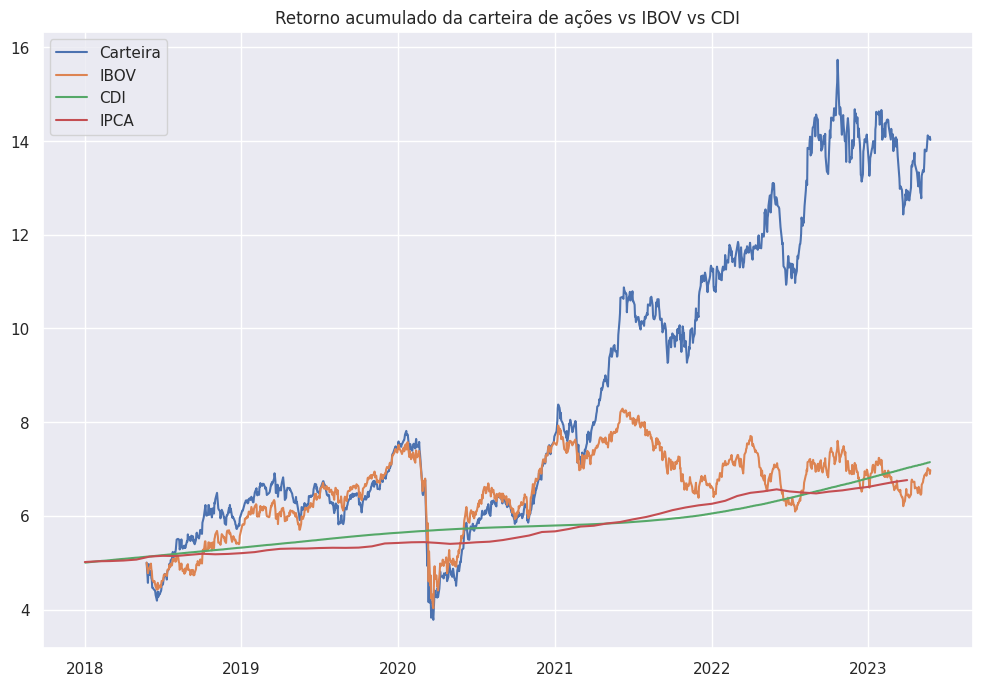

In [38]:
#criação dos graficos para o backtest

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(carteira_acumulada['saldo'], label='Carteira')
ax.plot(ibov_acumulado, label='IBOV')
ax.plot(cdi, label='CDI')
ax.plot(ipca, label='IPCA')
ax.set_title('Retorno acumulado da carteira de ações vs IBOV vs CDI')
ax.legend()
resultado = plt.show()
